<a href="https://colab.research.google.com/github/ABlackPenny/AIOps-Assistant/blob/main/lesson1_24_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install duckduckgo-search

In [12]:
from duckduckgo_search import ddg_images
from fastcore.all import *

In [13]:
def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [14]:
urls = search_images('Renaissance paint', max_images=1)
urls[0]

Searching for 'Renaissance paint'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


'https://mamabee.com/wp-content/uploads/2018/06/ginevra-optimized.jpg'

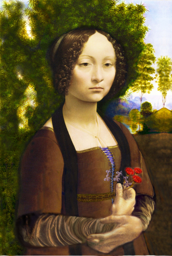

In [15]:
from fastdownload import download_url
dest = 'renai.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'Modern paint'


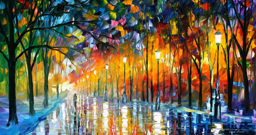

In [16]:
download_url(search_images('Modern paint', max_images=1)[0], 'mod.jpg', show_progress=False)
Image.open('mod.jpg').to_thumb(256,256)
#Paint is also a Label

In [17]:
searches = 'Renaissance','Modern'
path = Path('renai_or_mod')
# It is A OR B, it is not A or !A, I don't know whether there would be different
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} portrait photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} building photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)



Searching for 'Renaissance photo'
Searching for 'Renaissance portrait photo'
Searching for 'Renaissance building photo'
Searching for 'Modern photo'
Searching for 'Modern portrait photo'
Searching for 'Modern building photo'


In [18]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)


4

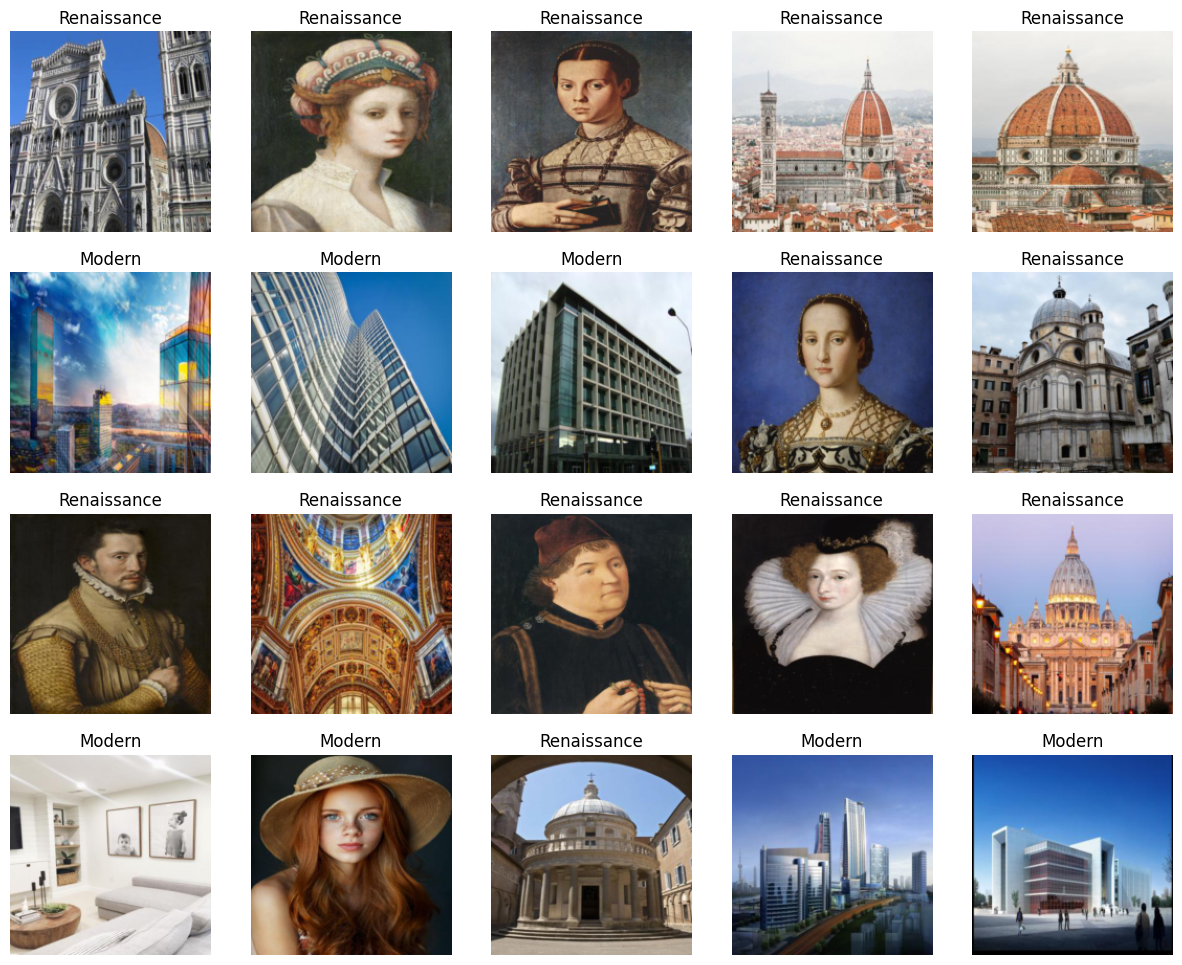

In [21]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=20)

In [20]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 71.4MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.831613,1.616185,0.500000,00:22


epoch,train_loss,valid_loss,error_rate,time
0,0.331980,0.553114,0.205882,00:31
1,0.205463,0.478312,0.117647,00:30
2,0.143532,0.465964,0.058824,00:29
